## Name: Jawad Ahmed Section: BCS-6A Roll No: 20P-0165
### A_Star Algorithm

# Lab 11 - Task

## Travelling on vacations to Romania

The map of Romania is represented as a graph, with cities as __nodes__ and roads as __edges__. You are given the starting city and the goal city. You need to write two functions, one using __BFS__ and one using __DFS__, to find a path between the starting city and the goal city.


__Your functions should take the following inputs:__

* G: A NetworkX graph object representing the map of Romania.
* start: The starting city.
* goal: The goal city.

Your functions should return a path (a list of cities) from the starting city to the goal city, or None if no such path exists.


### Import All the required libraries here 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

### Generate graph for Map of Romania

Note: Complete the missing part of the code

In [2]:
G = nx.Graph()

G.add_nodes_from(["Arad", "Bucharest", "Oradea", "Zerind", "Timisoara", "Lugoj", "Mehadia", "Dobreta", "Craiova", "Pitesti", "Rimnicu Vilcea", "Sibiu", "Fagarus", "Giurgiu", "Urziceni", "Vaslui", "lasi", "Neamt", "Hirsova", "Eforie"]) #add remaining nodes to the list


In [3]:
edges = [("Arad", "Zerind", 75),("Arad", "Sibiu", 140),     
         ("Arad", "Timisoara", 118), ("Zerind", "Oradea", 71), ("Timisoara", "Lugoj", 111), ("Lugoj", "Mehadia", 70), ("Mehadia", "Dobreta", 75),
         ("Dobreta", "Craiova", 120), ("Craiova", "Rimnicu Vilcea", 146), ("Craiova", "Pitesti", 138), ("Pitesti", "Rimnicu Vilcea", 97),
         ("Rimnicu Vilcea", "Sibiu", 80), ("Oradea", "Sibiu", 151), ("Sibiu", "Fagaras", 99), ("Fagaras", "Bucharest", 211),
         ("Pitesti", "Bucharest", 101), ("Bucharest", "Giurgiu", 90), ("Bucharest", "Urziceni", 85), ("Urziceni", "Vaslui", 142), ("Vaslui", "lasi", 92),
         ("Lasi", "Neamt", 87), ("Urziceni", "Hirsova", 98), ("Hirsova", "Eforie", 86), ("Fagaras", "Bucharest", 211)] #add remaining edges to the list

for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

 The Kamada-Kawai layout is a method for graph layout that aims to produce an aesthetically pleasing layout by minimizing the total energy of the graph. The layout is computed by treating the edges of the graph as springs and the nodes as charged particles, and then using an iterative algorithm to find the optimal positions of the nodes that balance the forces between them.

In [4]:
# Set node positions using Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)


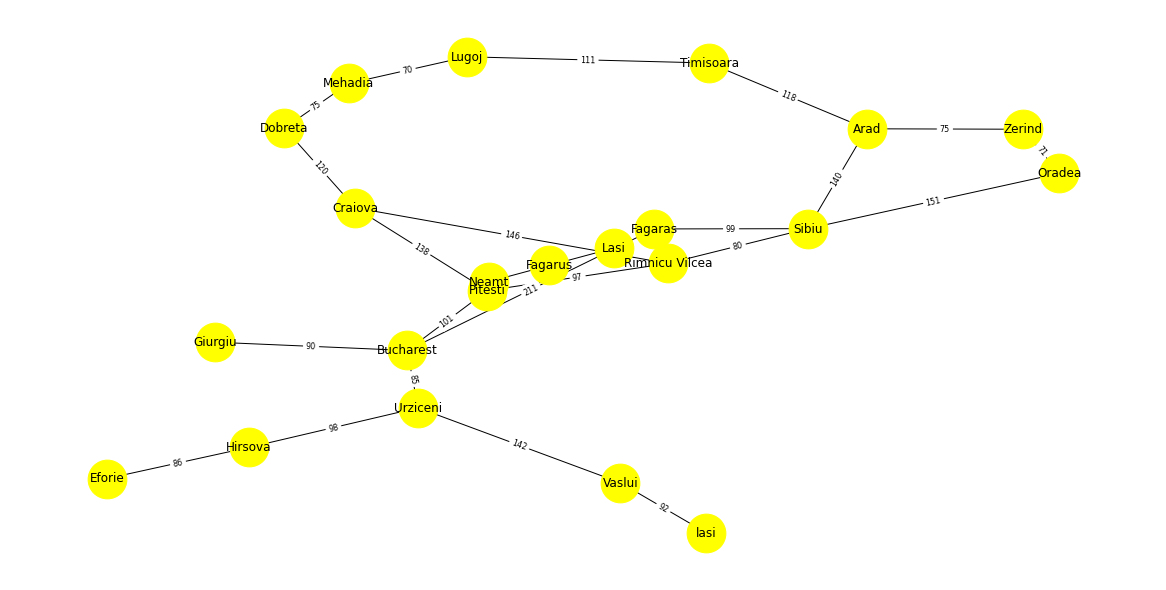

In [5]:
# Draw graph with labels and edge weights
plt.figure(figsize=(16, 8))
nx.draw(G, pos, with_labels=True, font_size=12, node_size= 1500, node_color ="yellow")

edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.show()

The __init__ method is the constructor for the Node class and takes three arguments: state, parent, and action.

* __state__ represents the state of the node, which is usually a position or a configuration in a search problem.
* __parent__ is a reference to the parent node in the search tree.
* __action__ is the action that was taken to get to the current node from its parent.

In [6]:
class Node():
    def __init__(self, state, parent, action):
        self.state = state
        self.parent = parent
        self.action = action

In [7]:
lat_long = {
    'Arad': (46.1667, 21.3167), 'Bucharest': (44.4167, 26.1000),
    'Craiova': (44.3333, 23.8167), 'Drobeta': (44.6259, 22.6566),
    'Eforie': (44.0667, 28.6333), 'Fagaras': (45.8416, 24.9730),
    'Giurgiu': (43.9037, 25.9699), 'Hirsova': (44.6833, 27.9500),
    'Iasi': (47.1585, 27.6014), 'Lugoj': (45.6904, 21.9033),
    'Neamt': (46.9283, 26.3705), 'Oradea': (47.0553, 21.9214),
    'Pitesti': (44.8565, 24.8697), 'Rimnicu Vilcea': (45.1042, 24.3758),
    'Sibiu': (45.7977, 24.1521), 'Timisoara': (45.7489, 21.2087),
    'Urziceni': (44.7167, 26.6333), 'Vaslui': (46.6333, 27.7333),
    'Zerind': (46.6225, 21.5174), 'Mehadia': (46.6333, 27.7333),
    'Dobreta': (46.6225, 21.5174)
}

In [8]:
import math
def huristics(start, goal):
    x1 = lat_long[start][0]
    y1 = lat_long[start][1]
    x2 = lat_long[goal][0]
    y2 = lat_long[goal][1]
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

In [9]:
import heapq
def A_star(start, goal, graph):
    l = []
    h = []
    huristic = 0
    weight = 0

    neigbours = list(graph.neighbors(start))
    for child in neigbours:
        weight = graph.get_edge_data(start, child)['weight']
        huristic = huristics(child, goal)
        cost = weight + huristic
        l.append(cost)
        l.append(start)
        l.append(child)
        heapq.heappush(h, l)
        l = []
        
    h1 = heapq.heappop(h)
    explored = set()
    explored.add(start)
    while True:
        if h1[-1] == goal:
            return h1[1:]
        explored.add(h1[-1])
        neigbours = list(graph.neighbors(h1[-1]))
        for child in neigbours:
            if child not in explored:
                weight = graph.get_edge_data(h1[-1], child)['weight']
                hurstic = huristics(child, goal)
                cost = weight + huristic
                h1[0] = cost
                h1.append(child)
                heapq.heappush(h, h1.copy())
                h1.pop()
        h1 = heapq.heappop(h)

In [10]:
def calculate_distance(path, graph):
    cost = 0
    for i in range(len(path) - 1):
        weight = graph.get_edge_data(path[i], path[i+1])['weight']
        cost += weight
    return cost

In [11]:
path = A_star('Arad', 'Bucharest', G)

In [12]:
distance = calculate_distance(path, G)

In [13]:
print("Shortest path from Arad to Bucharest: ", path)
print("Distance: ", distance)

Shortest path from Arad to Bucharest:  ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']
Distance:  418
